In [2]:
import tensorflow as tf
import numpy as np

# LeNet网络结构计算的第1步

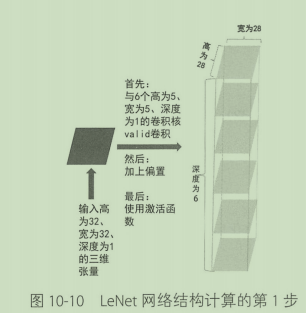

In [4]:
#第一步,其中卷积核和偏置都由满足高斯分布的随机数生成
x=tf.placeholder(tf.float32,[None,32,32,1])
# 6个高为5, 宽为5 , 深度为1的卷积核
k1=tf.Variable(tf.random_normal([5,5,1,6]),dtype=tf.float32)
c1=tf.nn.conv2d(x,k1,[1,1,1,1],'VALID')
#长度为6(因为卷积结果的输出深度为6)的偏置
b1=tf.Variable(tf.random_normal([6],dtype=tf.float32))
#c1与b1求和, 并输入激活函数
c1_b1=tf.add(c1,b1)
r1=tf.nn.relu(c1_b1)

# LeNet网络结构计算的第2步

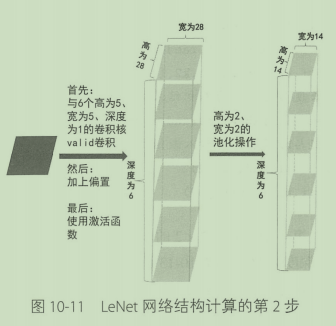

In [5]:
# 第2步
# 最大值池化操作, 池化掩码的尺寸为高2宽2, 步长 为2
p1=tf.nn.max_pool(r1,[1,2,2,1],[1,2,2,1],'VALID')

#  LeNet网络结构计算的第3步
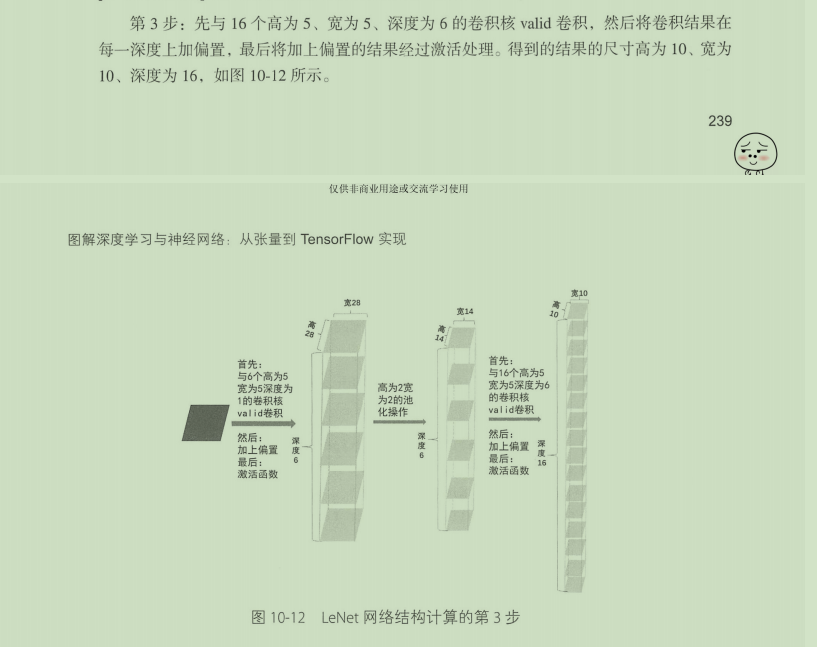

In [7]:
# 第3步对应的代码, 其中卷积核和偏置都由满足高斯分布的随机数生成

# p1与16个高为5,宽为5, 深度为6的卷积核的卷积
k2=tf.Variable(tf.random_normal([5,5,6,16]),dtype=tf.float32)
c2=tf.nn.conv2d(p1,k2,[1,1,1,1],'VALID')
#长度为16(因为卷积结果的输出深度为16)的偏置
b2=tf.Variable(tf.random_normal([16], dtype=tf.float32))

#c2与b2求和, 并输入激活函数
c2_b2=tf.add(c2,b2)
r2=tf.nn.relu(c2_b2)

#  LeNet网络结构计算的第4步
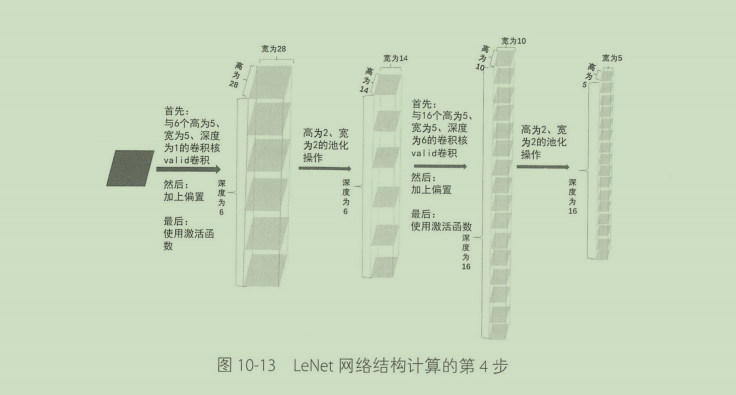

In [9]:
 # 第4步对应的代码
# 最大值池化操作, 池化掩码的尺寸是高为2, 宽为2, 步长为2

p2=tf.nn.max_pool(c2,[1,2,2,1],[1,2,2,1], 'VALID')

#  LeNet网络结构计算的第5步

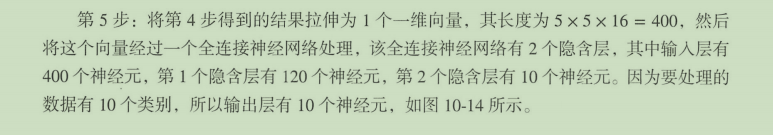

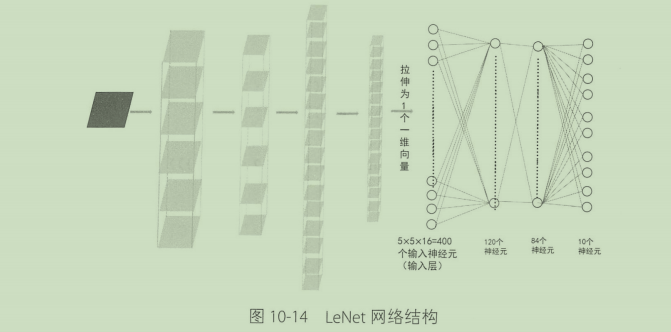

In [12]:
# 拉伸为一维张量, 作为一个全连接神经网络的输入, 
flatten_p2=tf.reshape(p2,[-1, 5*5*16])


#第1层的权重矩阵和偏置
w1=tf.Variable(tf.random_normal([5*5*16,120]))
bw1=tf.Variable(tf.random_normal([120]))

# 第1层的线性组合与偏置求和, 并作为relu激活函数的输入
h1=tf.add(tf.matmul(flatten_p2, w1), bw1)
sigma1=tf.nn.relu(h1)


#第2层的权重矩阵和偏置
w2=tf.Variable(tf.random_normal([120,84]))
bw2=tf.Variable(tf.random_normal([84]))

# 第2层的线性组合与偏置求和, 并作为relu激活函数的输入
h2=tf.add(tf.matmul(sigma1, w2), bw2)
sigma2=tf.nn.relu(h2)


#第3层的权重矩阵和偏置
w3=tf.Variable(tf.random_normal([84,10]))
bw3=tf.Variable(tf.random_normal([10]))

# 第3层的线性组合与偏置求和
h3=tf.add(tf.matmul(sigma2, w3), bw3)
# 将h3作为sigmod激活函数的输入, 作为最后输出层的输出
out=tf.nn.sigmoid(h3)


#创建会话
session=tf.Session()
#初始化变量
session.run(tf.global_variables_initializer())
session.run(tf.local_variables_initializer())

#打印结果如下
print(session.run(out, {x:np.random.normal(0,1,[2,32,32,1])}))






[[0. 1. 0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 0. 0. 1. 1. 1. 1. 1. 0.]]


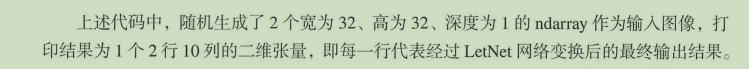

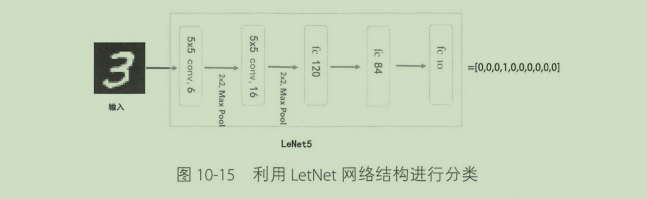

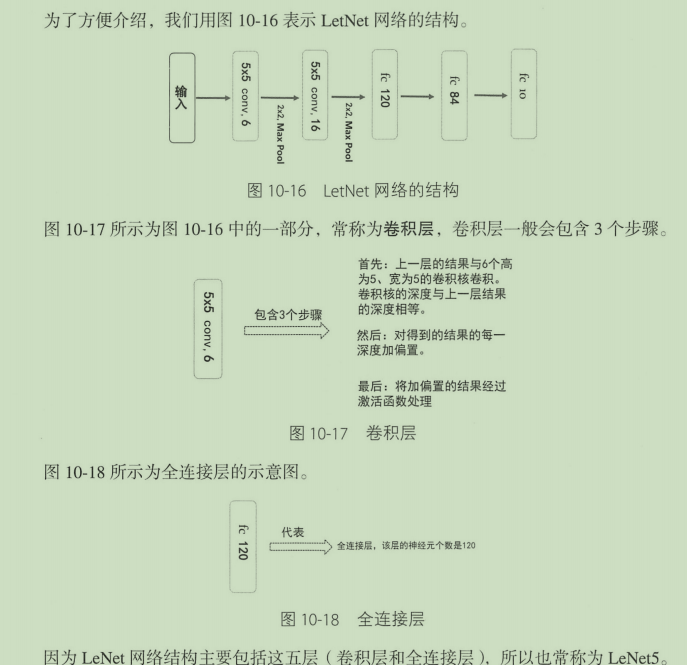